In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance



In [2]:
# Load the data
df = pd.read_csv('Safety_Score_dataset.csv')
df.head()


,FlightID,DepartureAirport,Arrival Airport,Route via,Weather,Visibility (V),Turbulence Intensity (knots) (TI),Wind Shear (m/s) (WS),Air Traffic Density (ATD),Precipitation(P),Pilot Experience(PE),Weather Forecast Accuracy (%) (FA),Maintenance History & Health Metrics (MH),Safety Score
0,FL001,BOM,CCU,HYD,Smoke,6,11,5,0.22,0,23,66,High,72.463768
1,FL002,BLR,IXC,DEL,Rain,8,5,0,0.17,6,11,80,Moderate,78.985507
2,FL003,DEL,HYD,BOM,Fog,4,17,15,0.20,0,22,97,High,64.492754
3,FL004,BOM,CCU,HYD,Smoke,6,3,2,0.06,0,19,81,High,81.159420
4,FL005,BLR,IXC,DEL,Fog,8,12,7,0.20,0,25,87,High,75.362319


In [3]:
df.describe()

,Visibility (V),Turbulence Intensity (knots) (TI),Wind Shear (m/s) (WS),Air Traffic Density (ATD),Precipitation(P),Pilot Experience(PE),Weather Forecast Accuracy (%) (FA),Safety Score
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,7.590000,10.142667,6.504667,0.128480,0.955333,16.328000,77.463333,73.508696
std,4.023352,6.487709,6.325556,0.069447,1.947271,8.428985,13.035718,9.812913
min,2.000000,0.000000,0.000000,0.010000,0.000000,2.000000,52.000000,36.231884
25%,5.000000,6.000000,2.000000,0.070000,0.000000,9.000000,67.000000,66.666667
50%,7.000000,9.000000,5.000000,0.130000,0.000000,17.000000,78.000000,73.913043
75%,10.000000,12.000000,7.000000,0.190000,0.000000,24.000000,89.000000,80.434783
max,18.000000,30.000000,25.000000,0.250000,7.000000,30.000000,99.000000,100.000000


In [4]:
label_encoders = {}
for column in ['Weather', 'Maintenance History & Health Metrics  (MH)']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [5]:
# Select relevant features and target variable
features = ['Weather', 'Visibility (V)', 'Turbulence Intensity (knots)  (TI)',
            'Wind Shear (m/s)  (WS)', 'Air Traffic Density  (ATD)', 'Precipitation(P)',
            'Pilot Experience(PE)', 'Weather Forecast  Accuracy (%)  (FA)',
            'Maintenance History & Health Metrics  (MH)']
X = df[features]
y = df['Safety Score']


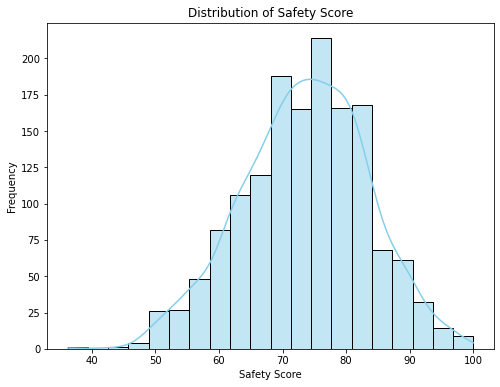

In [6]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Safety Score')
plt.xlabel('Safety Score')
plt.ylabel('Frequency')
plt.show()


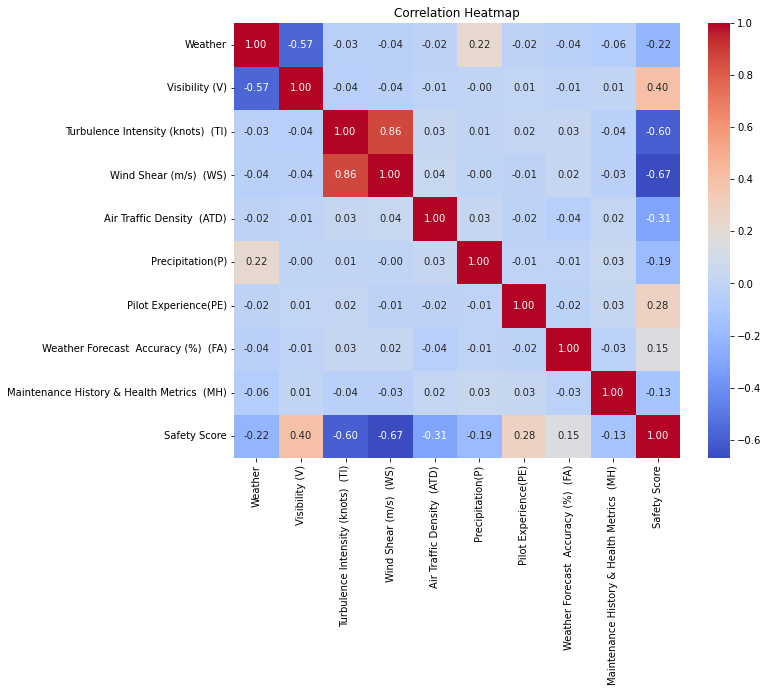

In [7]:
target = 'Safety Score'

# Calculate the correlation matrix
correlation_matrix = df[features + [target]].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

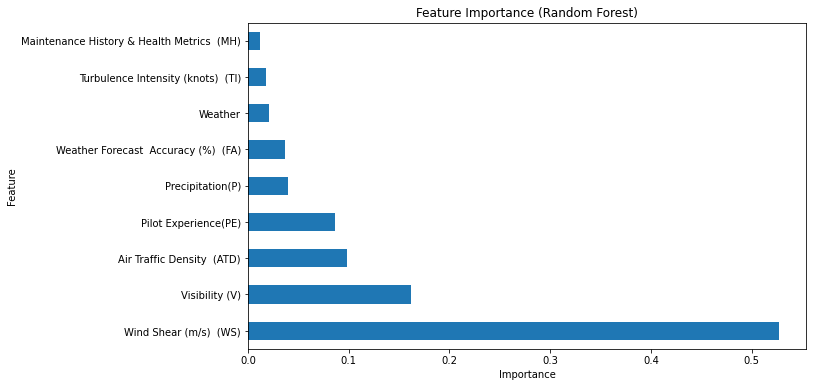

In [10]:
# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [11]:
# Evaluate the Random Forest Regressor
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)



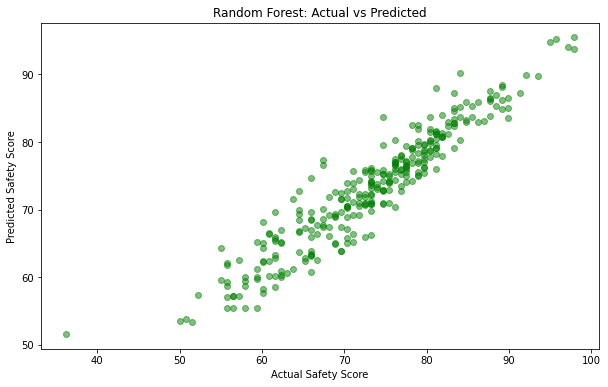

In [12]:
# Visualize the predictions made by Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Safety Score')
plt.ylabel('Predicted Safety Score')
plt.show()

In [13]:
# Print evaluation metrics for Random Forest
print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")



Random Forest Regressor Evaluation:
Mean Absolute Error: 2.3953623188333357
Mean Squared Error: 10.12654869336933
R-squared: 0.891423780138218


In [14]:
    # Initialize and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)


LinearRegression()

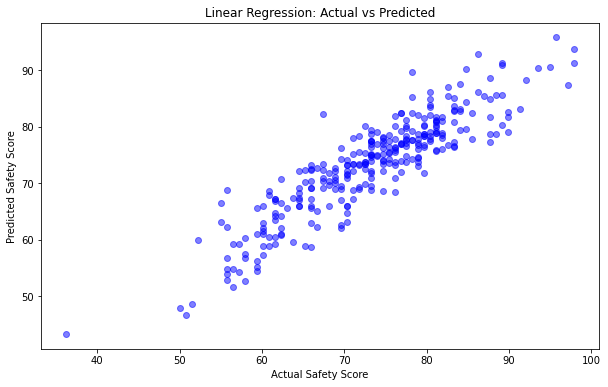

In [15]:
# Evaluate the Linear Regression model
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Visualize the predictions made by Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Safety Score')
plt.ylabel('Predicted Safety Score')
plt.show()


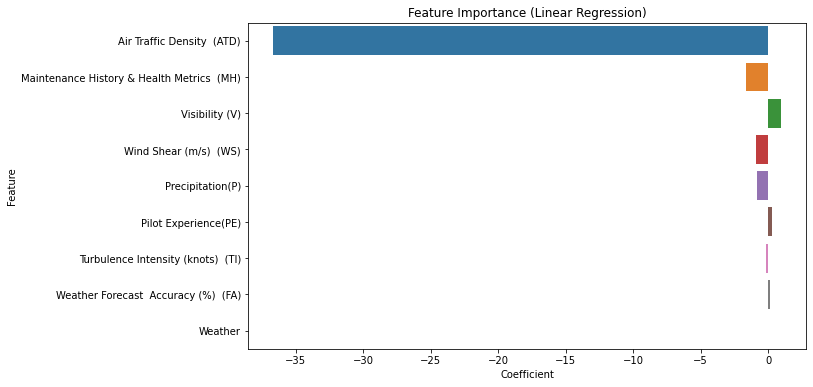

In [19]:
# Get the coefficients of the Linear Regression model
lr_coefficients = lr_model.coef_

# Create a DataFrame to store feature names and their corresponding coefficients
lr_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coefficients})

# Sort the coefficients by absolute value in descending order
lr_feature_importance = lr_feature_importance.reindex(lr_feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Visualize feature importance for Linear Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance)
plt.title('Feature Importance (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [21]:
import joblib

# Assume rf_model is your trained RandomForestRegressor model
joblib.dump(rf_model, 'model.pkl')

['model.pkl']

In [23]:
import joblib

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']